<a href="https://colab.research.google.com/github/adilsong3/DataScience_Academy/blob/master/Analisando_os_Dados_de_Atendimento_Laboratorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise dos Dados de Atendimento**

**Neste notebook, iremos analisar os dados referente aos atendimentos de um laboratório de analises clínicas com foco em CNPJ e os dados macros serão enviados por e-mail.** (Planilha utilizada é de demonstração)

# Obtenção dos Dados

Iremos trabalhar com os dados disponibilizados por um planilha em formato csv.

In [1]:
# Importar dos pacotes necessários
import pandas as pd
from datetime import datetime
import time
import smtplib
import email.message
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.mime.base import MIMEBase
from email import encoders
from os import PathLike

In [ ]:
# Importar o arquivo laboratorio.csv para um DataFrame
caminho = "laboratorio.csv"
df_cru = pd.read_csv(caminho, sep=",", error_bad_lines=False)

### VERIFICANDO AS COLUNAS DA TABELA DO INTERCOM

In [3]:
# Conhecendo as colunas do DataFrame
df_cru.columns

Index(['Conversation ID', 'Conversation URL', 'Title', 'Conversation status',
       'Conversation tags', 'Created at', 'Last updated at', 'Last closed at',
       'Time Zone', 'Inbound/Outbound', 'Reopened', 'Closed',
       'Conversation rating', 'Conversation rating requested',
       'Conversation rating remark', 'Companies (ID)', 'Companies (name)',
       'Company tags', 'Email', 'Location', 'Name', 'Type',
       'Participated (ID)', 'Participated (name)', 'Participated (email)',
       'People tags', 'User ID', 'Assigned to (ID)', 'Assigned to (name)',
       'Team assigned to (ID)', 'Team assigned to (name)', 'Closed by (ID)',
       'Closed by (name)', 'Teammates participated',
       'Time to first reply (seconds)', 'Time to last close (seconds)',
       'Teammate replies', 'Channel', 'Source'],
      dtype='object')

# **Análise dos Dados**

Essa etapa tem como objetivo se relacionar com os dados, se você não sabe o tipo de dados que está lidando esse é o momento para fazer a exploração inicial e conhecer os dados brutos.

* Primeiro vamos identificar cada coluna e 
colocar seu significado ao lado para uma melhor interpretação dos dados no futuro, seja para você ou para um terceiro se achar na sua analise.


**Dicionário das variáveis**

* **Conversation ID -** número de id gerado para identificar o atendimento
* **Conversation URL -** link do atendimento 
* **Title -** titulo do atendimento 
* **Conversation status -** status do atendimento
* **Conversation tags -** indentificadores de observações de cada atendimento
* **Created at -** data da criação do atendimento 
* **Last updated at -** data da última atualização do atendimento 
* **Last closed at' -** data de fechamento do atendimento
* **Time Zone -**  fuso horário
* Inbound/Outbound - tipo do atendimento
* **Reopened -** número de vezes que o atendimento foi reaberto 
* **Closed -** se o atendimento foi finalizado
* **Conversation rating -** nota de avaliação do atendimento
* **Conversation rating requested -** se foi solicitado avaliação
* **Conversation rating remark -** comentário da avaliação
* **Companies (ID) -** identificador do cliente (CNPJ/CPF)
* **Companies (name) -** nome do cliente
* **Company tags -** identificadores de observações de cada cliente
* **Email -** email do cliente 
* **Location -**  localização
* **Name -** nome da pessoa que entrou em contato
* **Type -** tipo 
* **Participated (ID) -** número de id gerado para identificar o participante de cada atendimento
* **Participated (name) -** nome de cada participante 
* **Participated (email) -** email do participante
* **People tags -** identificadores de observações de cada pessoa
* **User ID -** número de id gerado para identificar cada usuário
* **Assigned to (ID) -** número de id gerado para identificar cada atendente que foi atribuido ao atendimento
* **Assigned to (name) -** nome do atendente
* **Team assigned to (ID) -** número de id gerado para identificar cada time que foi atribuido ao atendimento
* **Team assigned to (name) -** nome do time
* **Closed by (ID) -** id do atendente que fechou o atendimento
* **Closed by (name) -** nome do atendente que fechou o atendimento
* **Teammates participated -** nome dos atendentes que participaram do atendimento
* **Time to first reply (seconds) -** tempo de primeira resposta do atendimento em segundos 
* **Time to last close (seconds) -** tempo de fechamento do atendimento em segundos
* **Teammate replies -** número de resposta de colegas que participaram
* **Channel -** por qual canal o cliente entrou em contato
* **Source -** fonte

***Agora que já conhecemos todas as colunas do nosso DataFrame, vamos duplica-lo para conseguir trabalhar sem editar o original.***

In [4]:
# Criando uma cópia do DataFrame original para trabalhar
df_editavel = df_cru.copy()

O que eu quero responder ao final desta análise?


1.   **Qual é o número de atendimento por cliente?**
2.   **Qual é o tempo médio de primeira resposta do laboratório para esse cliente(em segundos)?**
3.  **Qual é o tempo médio de fechamento dos atendimentos(em minutos)?**
4.  **Quantas avaliações esse cliente deu para os atendimento do laboratório?**
5.  **Qual é nota média de satisfação desse cliente para com o atendimento?**

Ao analisar nosso DataFrame, vemos que temos muitas colunas que não serão utilizadas para conseguir responder essas 5 perguntas.

Então vamos fazer a exclusão daquelas que não fazem sentido para nós nesse momento.

**Obs :** *Essas exclussões não podem ser feitas no DataFrame Cru, sempre deve ser feita no de edição.*

In [5]:
# Ecluindo colunas que não serão utilizadas para essa análise
df_editavel = df_editavel.drop(columns=[
    "Conversation ID", "Title", "Conversation status", "Time Zone", "Closed", "Conversation rating requested", "Company tags",
    "Conversation rating remark", "Participated (ID)", "User ID", "Closed by (ID)", "Closed by (name)", "Teammates participated",
    "Source", "Teammate replies", "Last updated at", "People tags", "Participated (name)", "Participated (email)",
    "Team assigned to (ID)", "Assigned to (ID)", "Reopened", "Email", "Location"
])

Sabemos que para fazer a analise de dados utilizando python, por convenção não utilizamos colunas que o nome esteja com espaço.

Então vamos renomear as colunas para arrumar os espações em branco e também para uma melhor compreenção dos dados.

In [6]:
# Renomeando o nome das colunas, arrancando os espaços e deixando mais legível
df_editavel = df_editavel.rename(columns={
    "Conversation URL": "url_conversa",
    "Created at" : "data_criacao",
    "Last closed at" : "data_fechamento",
    "Assigned to (name)" : "atendente",
    "Companies (ID)" : "CNPJs",
    "Companies (name)" : "estabelecimento", 
    "Conversation tags" : "tags",
    "Conversation rating" : "avaliacao",
    "Time to first reply (seconds)" : "tp_resposta",
    "Time to last close (seconds)" : "tf_resposta",
    "Type" : "tipo",
    "Name" : "operador",
    "Channel" : "canal_contato",
    "Team assigned to (name)" : "atendente"
})

Após fazer a renomeação das colunas que vamos trabalhar é importante verificar os tipos de dados de cada coluna antes de começar a fazer as transformações necessárias.

In [7]:
# verificando os tipos de dados que estamos trabalhando e a preenchimento de cada coluna
df_editavel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25159 entries, 0 to 25158
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   url_conversa      25159 non-null  object 
 1   tags              22260 non-null  object 
 2   data_criacao      25159 non-null  object 
 3   data_fechamento   25159 non-null  object 
 4   Inbound/Outbound  25159 non-null  object 
 5   avaliacao         7805 non-null   float64
 6   CNPJs             22966 non-null  object 
 7   estabelecimento   16469 non-null  object 
 8   operador          25150 non-null  object 
 9   tipo              25159 non-null  object 
 10  atendente         24803 non-null  object 
 11  atendente         7971 non-null   object 
 12  tp_resposta       24451 non-null  float64
 13  tf_resposta       25159 non-null  float64
 14  canal_contato     25159 non-null  object 
dtypes: float64(3), object(12)
memory usage: 2.9+ MB


Vemos acima que os campos de data estão do tipo object(string), ou seja, dessa forma o python não entende que é uma data e sim um texto.

Como primeira transformação vamos transformar o campo de ***objetic*** para ***datetime***

In [8]:
# convertendo os campos de data de object(string) para datetime
df_editavel["data_criacao"] = pd.to_datetime(df_editavel["data_criacao"], format="%Y-%m-%d %H:%M:%S")
df_editavel["data_fechamento"] = pd.to_datetime(df_editavel["data_fechamento"], format="%Y-%m-%d %H:%M:%S")

Já que começamos pela data, vamos aproveitar e expandir essa coluna para várias outras só que separado.

A ideia é criar outras colunas como ANO, MES, DIA, HORA, MINUTO E SEGUNDO.

In [9]:
# criando novas colunas especificas de data
df_editavel["ano"] = df_editavel["data_criacao"].dt.year
df_editavel["mes"] = df_editavel["data_criacao"].dt.month
df_editavel["dia"] = df_editavel["data_criacao"].dt.day
df_editavel["hora"] = df_editavel["data_criacao"].dt.hour
df_editavel["minutos"] = df_editavel["data_criacao"].dt.minute
df_editavel["segundos"] = df_editavel["data_criacao"].dt.second

Como um operador pode trabalhar em mais de um estabelecimento, precisamos usar uma regra para utilizar apenas o 1 CNPJ/CPF que o cliente estiver registrado.

Para isso vai ser necessário fazer um split(dividir) a coluna CNPJ em uma lista e criar uma nova coluna pegando apenas o primeiro CNPJ/CPF da lista.

In [10]:
# fazendo split da coluna CNPJ/CPF
divisao_cnpj = df_editavel["CNPJs"].str.split(",")

# criando uma nova coluna e inserindo o primeiro CNPJ/CPF encontrado do split anterior
cnpj = divisao_cnpj.str.get(0)
df_editavel["CNPJ/CPF"] = cnpj

Após fazer isso, vamos excluir a coluna CNPJ antiga pois só trabalharemos com a nova coluna, visto que agora só tem 1 informação por operador

In [11]:
# removendo o campo CNPJ/CPF para trabalharmos apenas com a nova coluna
df_editavel = df_editavel.drop(
    columns=[
        "CNPJs"
    ]
)

### **Vamos resolver as 5 perguntas propostas com algumas funções**
*  função para contar chamados do cliente escolhido
*  função para calcular tempo médio de primeira resposta
*  função para calcular tempo médio de fechamento de cada atendimento
*  função para contar o número de avaliação e calcular a nota média de satisfação do cliente com o atendimento
*  função para contar o chamadas de cada operador
*  função para gerar um novo dataframe resumido apenas do CNPJ/CPF escolhido
*  função para enviar e-mail com todos os dados gerados gerados das outras funções
*  função main que vai chamar todas as funções e fazer a magia acontecer

***Cada função será criada com o objetivo de ser utilizada individualmente, para que facilite em analises futuras!***

# **Qual é o número de atendimento por cliente?**

In [12]:
# função que recebe um CNPJ/CPF e faz a contagem de atendimento/chamados
def count_chamado_cnpj(valor=[]):
  cnpj_filter = df_editavel.copy()
  cnpj_filter = cnpj_filter.loc[(cnpj_filter["CNPJ/CPF"].isin(valor))]

  if len(cnpj_filter) == 0:
    return print("Sem chamado encontrado!")
  else:
    if len(valor) == 1:
      contador = cnpj_filter["CNPJ/CPF"].count()
    else:
      contador = cnpj_filter.groupby("CNPJ/CPF")["CNPJ/CPF"].count().sort_values(ascending=False)

  return contador

In [13]:
# chamando a função de contagem
count_chamado_cnpj(["21791666000185"])

20

# **Qual é o tempo médio de primeira resposta do laboratório para esse cliente(em segundos)?**

In [14]:
# função que recebe um CNPJ/CPF e faz o calculo médio de tempo da primeira resposta
def primeira_resposta_cnpj(valor=[]):
  cnpj_filter = df_editavel.copy()
  cnpj_filter = cnpj_filter.loc[(cnpj_filter["CNPJ/CPF"].isin(valor))]

  if len(cnpj_filter) == 0:
    return print("Sem chamado encontrado!")
  else:
    # PREENCHENDO OS CAMPOS NULLOS DA COLUNA TP_RESPOSTA COM A MÉDIA DÁ PRÓPRIA COLUNA
    cnpj_filter["tp_resposta"].fillna(cnpj_filter["tp_resposta"].mean(), inplace=True)

    if len(valor) == 1:
      primeira = cnpj_filter["tp_resposta"].mean()
    else:
      primeira = cnpj_filter.groupby(["CNPJ/CPF"])["tp_resposta"].mean().sort_values(ascending=False)

  return primeira

In [16]:
# chamando a função de primeira resposta
primeira_resposta_cnpj(["21791666000185"])

75.5

# **Qual é o tempo médio de fechamento dos atendimentos(em minutos)?**

In [17]:
# função que recebe um CNPJ/CPF e faz o cálculo médio do tempo de fechamento dos atendimentos
def tempo_fechamento_cnpj(valor=[]):
  cnpj_filter = df_editavel.copy()
  cnpj_filter = cnpj_filter.loc[(cnpj_filter["CNPJ/CPF"].isin(valor))]

  if len(cnpj_filter) == 0:
    return print("Sem chamado encontrado!")
  else: 
    if len(valor) == 1:
      fechamento = cnpj_filter["tf_resposta"].mean()
    else:
      fechamento = cnpj_filter.groupby(["CNPJ/CPF"])["tf_resposta"].mean().sort_values(ascending=False)

  return fechamento

In [18]:
# chamando a função de tempo de fechamento em minutos
round(tempo_fechamento_cnpj(["21791666000185"]) / 60)

35

# **Número de atendimentos por operador**

In [19]:
# função que recebe um CNPJ/CPF e faz a contagem de atendimento/chamados por operador
def count_chamado_operador(valor=[]):
  cnpj_filter = df_editavel.copy()
  cnpj_filter = cnpj_filter.loc[(cnpj_filter["CNPJ/CPF"].isin(valor))]
  
  if len(cnpj_filter) == 0:
    return print("Sem chamado encontrado!")
  
  contador = cnpj_filter.groupby("operador")["CNPJ/CPF"].count().sort_values(ascending=False)

  return contador

In [20]:
# chamando a função de chamado por operador
count_chamado_operador(["21791666000185"])

operador
Alini Maria dos Santos Lucena    20
Name: CNPJ/CPF, dtype: int64

# **Quantas avaliações esse cliente deu para os atendimento do laboratório?**

# **Qual é nota média de satisfação desse cliente para com o atendimento?**

In [21]:
# função que recebe um CNPJ/CPF e faz a contagem de avaliações e determina a nota média de satisfação do cliente
def avaliacao_cnpj(valor=[]):
  cnpj_filter = df_editavel.copy()
  cnpj_filter = cnpj_filter.loc[(cnpj_filter["CNPJ/CPF"].isin(valor))]

  if len(cnpj_filter) == 0:
    return print("Sem chamado encontrado!")
  
  avaliacao = cnpj_filter["avaliacao"].count()
  ava_media = cnpj_filter["avaliacao"].mean()

  return avaliacao, ava_media

In [22]:
# chamando a função de avaliação por cliente
print("Número de avaliações: ", avaliacao_cnpj(["21791666000185"])[0])
print("Nota média de satisfação: ", avaliacao_cnpj(["21791666000185"])[1])

Número de avaliações:  8
Nota média de satisfação:  4.5


# **Gerando uma nova planilha**

In [23]:
# função que gera um novo csv com o dados mais importantes do cliente incluindo o link de cada atendimento
# url, data da criação, tags, cnpj/cpf, operador, tp_resposta, tf_resposta, atendente
def novo_csv_resumido(valor=[]):
  cnpj_filter = df_editavel.copy()
  cnpj_filter = cnpj_filter.loc[(cnpj_filter["CNPJ/CPF"].isin(valor)), [
      "data_criacao","url_conversa", "tags", 
      "CNPJ/CPF", "operador", "tp_resposta",
      "tf_resposta", "atendente"
      ]
    ]

  if len(cnpj_filter) == 0:
    return print("Sem chamado encontrado!")
  else:
    if len(valor) == 1:
      path = f"novo_csv_resumido_{valor[0]}.csv"
      cnpj_filter.to_csv(path, index=False, encoding="UTF-8", sep=",")
      return path
    else:
      cnpj_filter.to_csv(f"novo_csv_resumido_{len(valor)}.csv", index=False, encoding="UTF-8", sep=",")

# **Enviando um e-mail com a resposta de cada pergunta**

In [24]:
# função para enviar um e-mail com as 5 perguntas respondidas
def enviar_email(contagem, primeira, fechamento, avaliacao, ava_media, cnpj, path): 

    # o envio de mensagens do e-mail aceita formatação HTML
    corpo_email = f"""
    <p>Olá, Tudo bem?</p>
    <br>
    <p>Conforme solicitado segue os dados abaixo: </p>
    <br>
    <p><b>- Número total de atendimentos:</b> {contagem}</p>
    <p><b>- Tempo médio de primeira resposta:</b> {round(primeira)} <b>(s)</b></p>
    <p><b>- Tempo médio de fechamento do chat:</b> {round((fechamento) / 60)} <b>(m)</b></p>
    <p><b>- Número total de avaliações:</b> {avaliacao}</p>
    <p><b>- Nota média de avaliação:</b> {ava_media}</p>
    <br>
    <p>Qualquer dúvida fico a disposição,</p>
    <p>Att, </p>
    <p>Adilson Gustavo </p>
    <p><b>Ps:</b> E-mail enviado utilizando script em Python</p>
    """

    # Para quem será enviado o e-mail
    destinarios = ["adilsons2tv@gmail.com", "adilson.barreto@hitechnologies.com.br"]
    ocultos = ["adilsons2tv@gmail.com"]

    msg = MIMEMultipart()
    msg["Subject"] = f"Dados referente ao CNPJ/CPF {cnpj[0]}" #assunto
    msg["From"] = "adilson.barreto@hitechnologies.com.br" #remetente
    msg["To"] = ", ".join(destinarios) #destinatario
    msg["Cc"] = ", ".join(ocultos) #destinatario oculto
    password = "samsemkimelhceuu" #senha gerada para uso e depois excluida
    msg.attach(MIMEText(corpo_email, "html"))

    # criando anexo
    # Ler o arquivo em binário e codificamos para base64 para o e-mail aceitar
    anexo = path
    attchment = open(anexo, "rb")
    att = MIMEBase("application", "octet-stream")
    att.set_payload(attchment.read())
    encoders.encode_base64(att)

    # Criando o cabeçalho do anexo
    att.add_header("content-Disposition", f"attachment; filename={anexo}")

    # fechando o arquivo
    attchment.close()

    # anexando o arquivo
    msg.attach(att)

    s = smtplib.SMTP("smtp.gmail.com: 587")
    s.starttls()
    # Login Credentials for sending the mail
    s.login(msg["From"], password)
    s.sendmail(msg["From"], (destinarios+ocultos), msg.as_string().encode("utf-8"))

# **Criando a função de que executa todas as outras**

In [25]:
def main_cnpj_email(valor=[]):
  count_geral = count_chamado_cnpj(valor)
  if count_geral == None:
    return None

  primeira_resposta = primeira_resposta_cnpj(valor)
  tempo_fechamento = tempo_fechamento_cnpj(valor)
  avaliacao = avaliacao_cnpj(valor)[0]
  avaliacao_media = avaliacao_cnpj(valor)[1]
  path = novo_csv_resumido(valor)
  time.sleep(10)
  email = enviar_email(
      count_geral, 
      primeira_resposta, 
      tempo_fechamento, 
      avaliacao, 
      avaliacao_media, 
      valor, 
      path
  )

  print("\nNova planilha foi gerada com sucesso.")
  print("E-mail enviado com sucesso!")

In [26]:
# chamando a função de execução main_cnpj_email( [ "PASSAR O CNPJ/CPF SEM PONTO" ] )
main_cnpj_email(["21791666000185"])


Nova planilha foi gerada com sucesso.
E-mail enviado com sucesso!


# **Como o e-mail chegou**

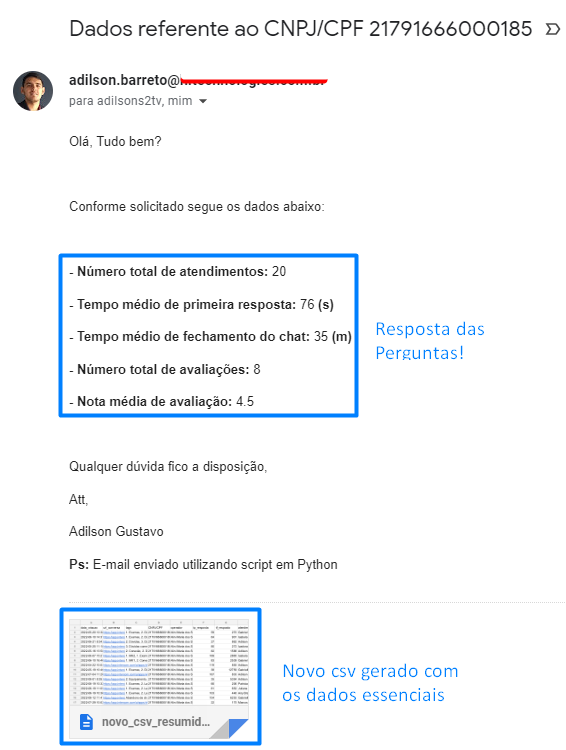

# **Respostas para todas as perguntas**

In [27]:
print("Cliente selecionado: 21791666000185")
print(f"Qual é o número de atendimento desse cliente?: {count_chamado_cnpj(['21791666000185'])}")
print("===================================")
print(f"Qual é o tempo médio de primeira resposta do laboratório para esse cliente(em segundos)?: {primeira_resposta_cnpj(['21791666000185'])}s")
print(f"Qual é o tempo médio de fechamento dos atendimentos(em minutos)?: {round(tempo_fechamento_cnpj(['21791666000185']) / 60)}m")
print("===================================")
print(f"Quantas avaliações esse cliente deu para os atendimento do laboratório?: {avaliacao_cnpj(['21791666000185'])[0]}")
print(f"Qual é nota média de satisfação desse cliente para com o atendimento?: {avaliacao_cnpj(['21791666000185'])[1]}")

Cliente selecionado: 21791666000185
Qual é o número de atendimento desse cliente?: 20
Qual é o tempo médio de primeira resposta do laboratório para esse cliente(em segundos)?: 75.5s
Qual é o tempo médio de fechamento dos atendimentos(em minutos)?: 35m
Quantas avaliações esse cliente deu para os atendimento do laboratório?: 8
Qual é nota média de satisfação desse cliente para com o atendimento?: 4.5
